,Track Name,Danceability,Energy,Valence,Tempo,Acousticness,Instrumentalness
0,Wanna Be Startin' Somethin',0.842,0.872,0.906,122.111,0.0259,0.419000
1,Baby Be Mine,0.843,0.483,0.665,109.588,0.0848,0.000008
2,The Girl Is Mine (with Paul McCartney),0.681,0.527,0.707,81.425,0.2250,0.000000
3,Thriller,0.771,0.687,0.783,118.392,0.0318,0.000225
4,Beat It,0.776,0.711,0.901,138.728,0.0242,0.000353
5,Billie Jean,0.932,0.457,0.884,117.002,0.0173,0.043600
6,Human Nature,0.628,0.409,0.755,93.005,0.4980,0.005650
7,P.Y.T. (Pretty Young Thing),0.894,0.670,0.961,127.209,0.1720,0.000363
8,The Lady in My Life,0.662,0.344,0.436,146.016,0.3690,0.000109


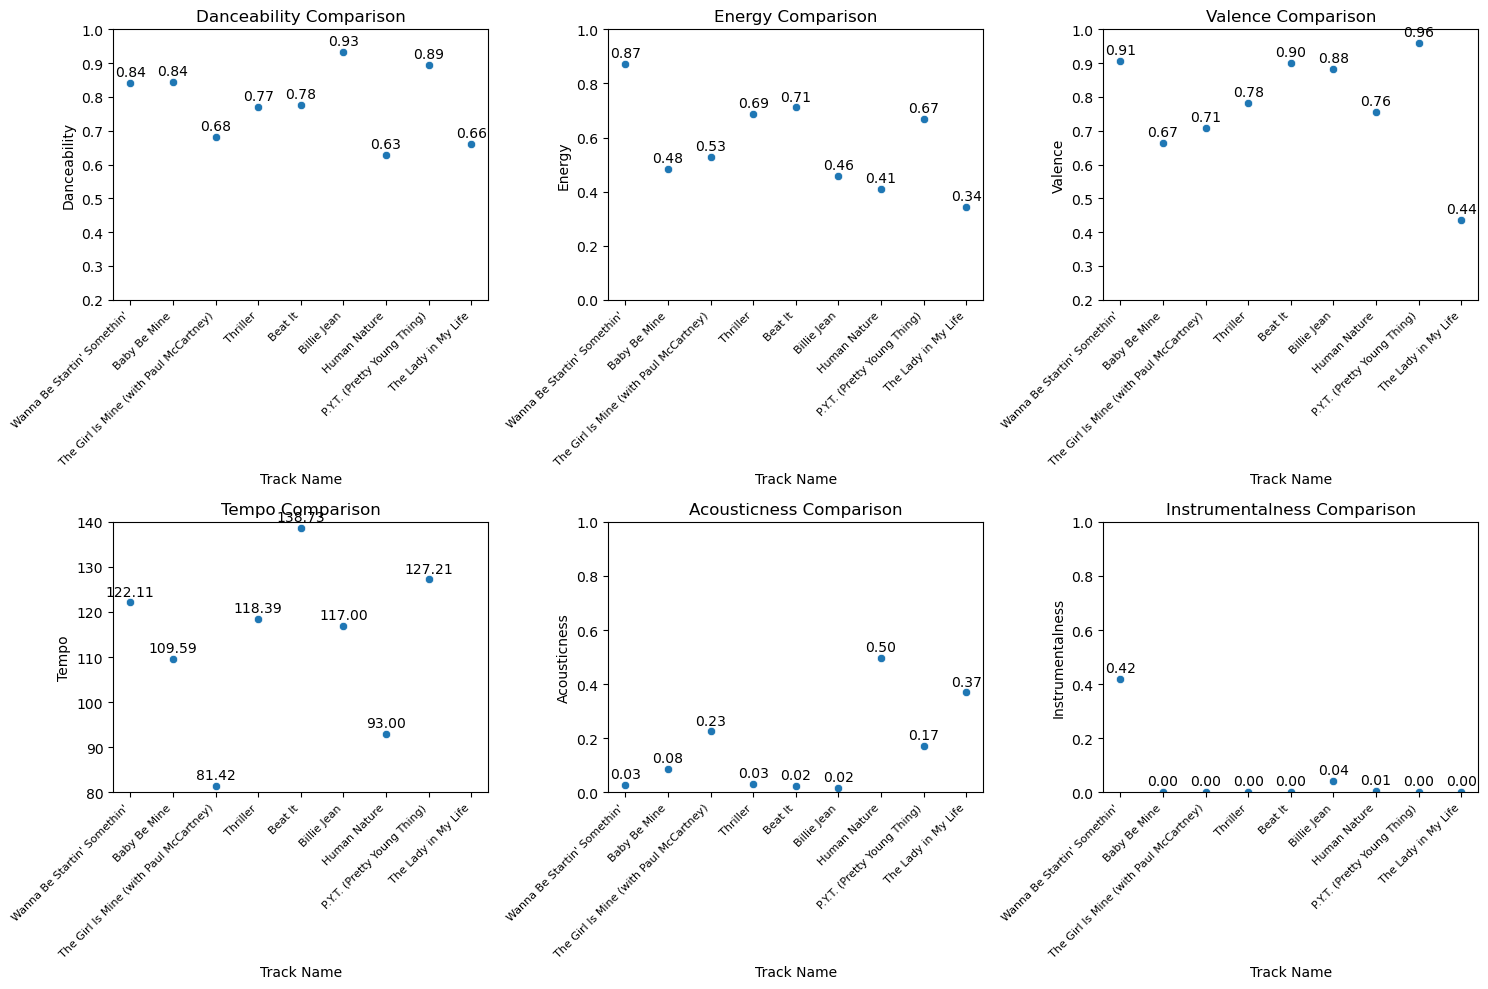

In [4]:
# Import necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'YOUR_CLIENT_ID' and 'YOUR_CLIENT_SECRET' with your actual Spotify API credentials
client_id = 'YOUR_CLIENT_ID'
client_secret = 'YOUR_CLIENT_SECRET'

# Authenticate with the Spotify API
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Function to get tracks from an album by searching for the album
def get_tracks_from_album(album_name):
    # Search for the album by name
    results = sp.search(q=f'album:{album_name}', type='album', limit=1)
    
    # Check if the album is found
    if not results['albums']['items']:
        raise ValueError(f'Album "{album_name}" not found.')
    
    # Get the album ID
    album_id = results['albums']['items'][0]['id']
    
    # Get tracks from the album
    album_tracks = sp.album_tracks(album_id)['items']
    
    return album_tracks

# Michael Jackson's "Thriller" album name
thriller_album_name = 'Thriller'

# Get all tracks from the "Thriller" album
thriller_tracks = get_tracks_from_album(thriller_album_name)

# Create a list to store the data
data = []

# Iterate through each track
for track in thriller_tracks:
    # Extract track details
    track_name = track['name']
    track_id = track['id']

    # Get audio features for the track
    track_features = sp.audio_features([track_id])[0]

    # Append data to the list
    data.append({
        'Track Name': track_name,
        'Danceability': track_features['danceability'],
        'Energy': track_features['energy'],
        'Valence': track_features['valence'],
        'Tempo': track_features['tempo'],
        'Acousticness': track_features['acousticness'],
        'Instrumentalness': track_features['instrumentalness']
    })

# Create a DataFrame from the list
df = pd.DataFrame(data)

# Display the DataFrame
display(df)

# Compare audio features of each track within the "Thriller" album with scatterplots
plt.figure(figsize=(15, 10))

# Define y-axis limits for better clarity
y_axis_limits = {
    'Danceability': (0.2, 1),
    'Energy': (0, 1),
    'Valence': (0.2, 1),
    'Tempo': (80, 140),
    'Acousticness': (0, 1),
    'Instrumentalness': (0, 1)
}

# Danceability comparison
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='Track Name', y='Danceability', marker='o')
plt.title('Danceability Comparison')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels and reduce font size for better visibility
plt.ylim(y_axis_limits['Danceability'])

# Add y-axis value annotations
for i, row in df.iterrows():
    plt.annotate(f'{row["Danceability"]:.2f}', (i, row['Danceability']), textcoords="offset points", xytext=(0, 5), ha='center')

# Energy comparison
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='Track Name', y='Energy', marker='o')
plt.title('Energy Comparison')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels and reduce font size for better visibility
plt.ylim(y_axis_limits['Energy'])

# Add y-axis value annotations
for i, row in df.iterrows():
    plt.annotate(f'{row["Energy"]:.2f}', (i, row['Energy']), textcoords="offset points", xytext=(0, 5), ha='center')

# Valence comparison
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='Track Name', y='Valence', marker='o')
plt.title('Valence Comparison')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels and reduce font size for better visibility
plt.ylim(y_axis_limits['Valence'])

# Add y-axis value annotations
for i, row in df.iterrows():
    plt.annotate(f'{row["Valence"]:.2f}', (i, row['Valence']), textcoords="offset points", xytext=(0, 5), ha='center')

# Tempo comparison
plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='Track Name', y='Tempo', marker='o')
plt.title('Tempo Comparison')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels and reduce font size for better visibility
plt.ylim(y_axis_limits['Tempo'])

# Add y-axis value annotations
for i, row in df.iterrows():
    plt.annotate(f'{row["Tempo"]:.2f}', (i, row['Tempo']), textcoords="offset points", xytext=(0, 5), ha='center')

# Acousticness comparison
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='Track Name', y='Acousticness', marker='o')
plt.title('Acousticness Comparison')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels and reduce font size for better visibility
plt.ylim(y_axis_limits['Acousticness'])

# Add y-axis value annotations
for i, row in df.iterrows():
    plt.annotate(f'{row["Acousticness"]:.2f}', (i, row['Acousticness']), textcoords="offset points", xytext=(0, 5), ha='center')

# Instrumentalness comparison
plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x='Track Name', y='Instrumentalness', marker='o')
plt.title('Instrumentalness Comparison')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels and reduce font size for better visibility
plt.ylim(y_axis_limits['Instrumentalness'])

# Add y-axis value annotations
for i, row in df.iterrows():
    plt.annotate(f'{row["Instrumentalness"]:.2f}', (i, row['Instrumentalness']), textcoords="offset points", xytext=(0, 5), ha='center')

plt.tight_layout()
plt.show()
